#Problem STAtement


This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. 
There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [9]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1]:
# Importing dataset
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [2]:
df.shape

(7752, 25)

In [ ]:
#Their are 7752 rows and 25 columns in dataset

In [3]:
#for displaying max. rows
pd.set_option('display.max_rows', None)

In [4]:
# checking Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
#checking datatype
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [6]:
#Two types of data type present in dataset. 1. float, 2. object

In [7]:
#checking null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

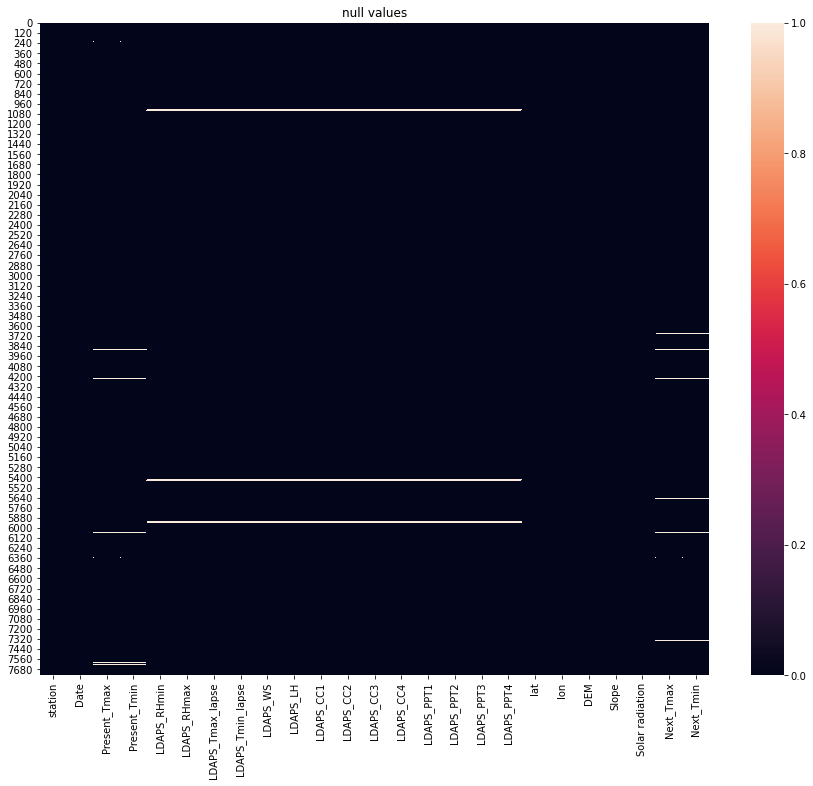

In [10]:
#Heatmap for checking null values
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [ ]:
#from above observations, columns having null values need to fill null values

In [11]:
#filling null values using mean values
df["station"]=df["station"].replace(np.NaN,df["station"].mean())
df["Present_Tmax"]=df["Present_Tmax"].replace(np.NaN,df["Present_Tmax"].mean())
df["Present_Tmin"]=df["Present_Tmin"].replace(np.NaN,df["Present_Tmin"].mean())
df["LDAPS_RHmin"]=df["LDAPS_RHmin"].replace(np.NaN,df["LDAPS_RHmin"].mean())
df["LDAPS_RHmax"]=df["LDAPS_RHmax"].replace(np.NaN,df["LDAPS_RHmax"].mean())
df["LDAPS_Tmax_lapse"]=df["LDAPS_Tmax_lapse"].replace(np.NaN,df["LDAPS_Tmax_lapse"].mean())
df["LDAPS_Tmin_lapse"]=df["LDAPS_Tmin_lapse"].replace(np.NaN,df["LDAPS_Tmin_lapse"].mean())
df["LDAPS_WS"]=df["LDAPS_WS"].replace(np.NaN,df["LDAPS_WS"].mean())
df["LDAPS_LH"]=df["LDAPS_LH"].replace(np.NaN,df["LDAPS_LH"].mean())
df["LDAPS_CC1"]=df["LDAPS_CC1"].replace(np.NaN,df["LDAPS_CC1"].mean())
df["LDAPS_CC2"]=df["LDAPS_CC2"].replace(np.NaN,df["LDAPS_CC2"].mean())
df["LDAPS_CC3"]=df["LDAPS_CC3"].replace(np.NaN,df["LDAPS_CC3"].mean())
df["LDAPS_CC4"]=df["LDAPS_CC4"].replace(np.NaN,df["LDAPS_CC4"].mean())
df["LDAPS_PPT1"]=df["LDAPS_PPT1"].replace(np.NaN,df["LDAPS_PPT1"].mean())
df["LDAPS_PPT2"]=df["LDAPS_PPT2"].replace(np.NaN,df["LDAPS_PPT2"].mean())
df["LDAPS_PPT3"]=df["LDAPS_PPT3"].replace(np.NaN,df["LDAPS_PPT3"].mean())
df["LDAPS_PPT4"]=df["LDAPS_PPT4"].replace(np.NaN,df["LDAPS_PPT4"].mean())
df["Next_Tmax"]=df["Next_Tmax"].replace(np.NaN,df["Next_Tmax"].mean())
df["Next_Tmin"]=df["Next_Tmin"].replace(np.NaN,df["Next_Tmin"].mean())

In [12]:
#filling null values using mode values
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])

In [ ]:
# null values treated with mean and mode values

In [13]:
#Converting object type data into integers
encode = LabelEncoder() 
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [14]:
#checking columns name
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [15]:
#multivariate analysis
corr_mat=df.corr()
corr_mat

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000e+00,2.503011e-17,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,...,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-0.255830,-0.090061,-0.019001,0.107983,0.128293
Date,2.503011e-17,1.000000e+00,-0.135988,-0.102590,-0.069481,-0.020237,-0.155719,-0.172066,-0.046844,-0.018130,...,-0.013026,0.000416,-0.038417,-0.000052,0.000061,-0.000414,-0.000449,-0.432937,-0.115928,-0.126034
Present_Tmax,1.126554e-01,-1.359879e-01,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,...,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,1.316462e-01,-1.025896e-01,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,...,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-6.673316e-02,-6.948061e-02,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,...,0.390967,0.240642,0.168595,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-1.669845e-01,-2.023651e-02,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,...,0.229050,0.134607,0.117853,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,6.910718e-02,-1.557186e-01,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,...,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,1.047582e-01,-1.720661e-01,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,...,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,5.277000e-03,-4.684370e-02,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,...,0.191886,0.161684,0.144085,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,-1.333566e-01,-1.812964e-02,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,...,-0.077545,0.016102,0.019979,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440


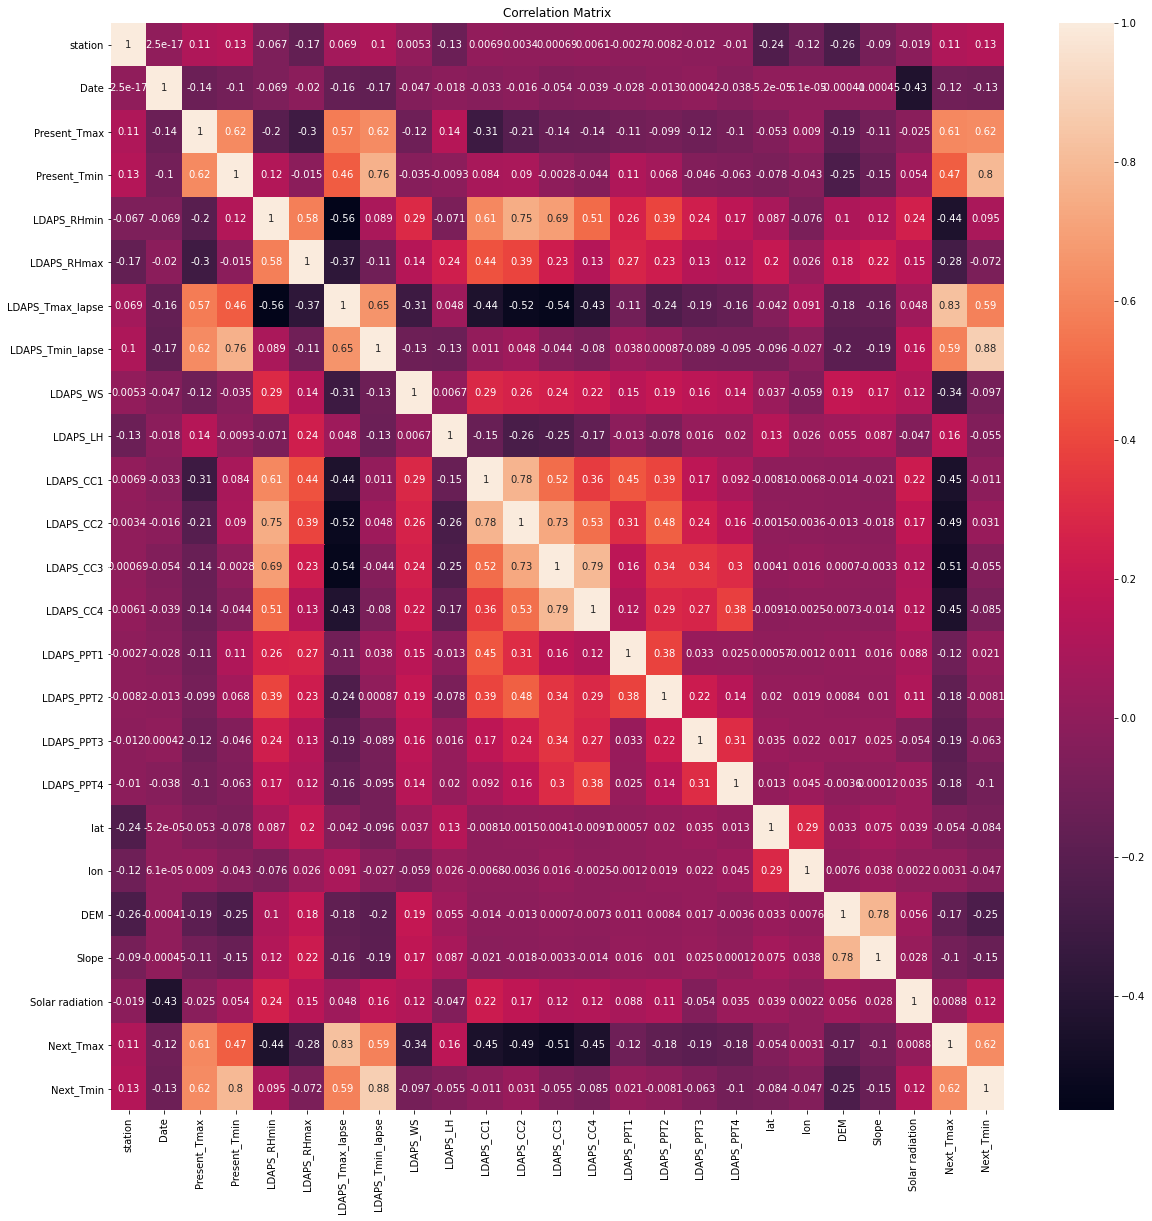

In [16]:
# heatmap for analysing correlation
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
#for better understanding correlation with target col.
corr_mat=df.corr()
corr_mat["Next_Tmax"].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827189
Next_Tmin           0.621427
Present_Tmax        0.610348
LDAPS_Tmin_lapse    0.586983
Present_Tmin        0.471806
LDAPS_LH            0.157616
station             0.107983
Solar radiation     0.008795
lon                 0.003052
lat                -0.053510
Slope              -0.102725
Date               -0.115928
LDAPS_PPT1         -0.118817
DEM                -0.172538
LDAPS_PPT2         -0.178383
LDAPS_PPT4         -0.178718
LDAPS_PPT3         -0.194143
LDAPS_RHmax        -0.283738
LDAPS_WS           -0.342729
LDAPS_RHmin        -0.437898
LDAPS_CC4          -0.446319
LDAPS_CC1          -0.452541
LDAPS_CC2          -0.490756
LDAPS_CC3          -0.514680
Name: Next_Tmax, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

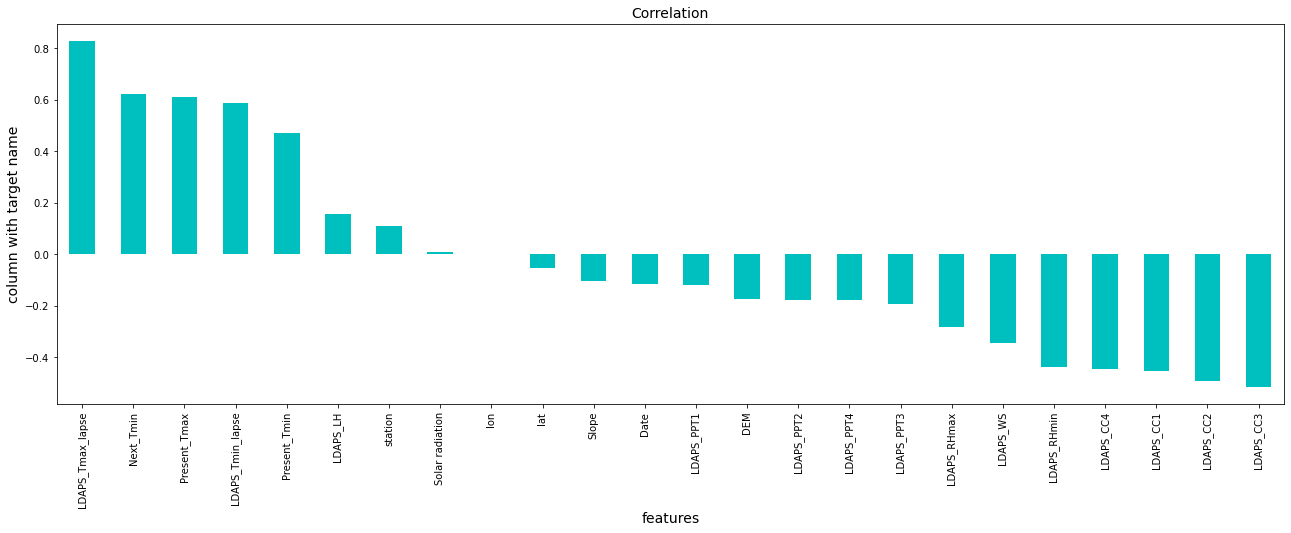

In [18]:
#plotting graph showing +ve and -ve correlation of coloumn(with target col.-primary_fuel)
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('features', fontsize=14)
plt.ylabel('column with target name', fontsize=14)
plt.title('Correlation', fontsize=14)
plt.show

In [ ]:
# Above corerelation matrix with target columns shown as follows:
# 9 columns shown +ve correlation with Target column, whereas highest correaltion is 0.828811.
# remaining cols. shown -ve correaltion.

In [19]:
#for better understanding correlation with another target col.
corr_mat=df.corr()
corr_mat["Next_Tmin"].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.880176
Present_Tmin        0.796670
Present_Tmax        0.622741
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.586868
station             0.128293
Solar radiation     0.120212
LDAPS_RHmin         0.095019
LDAPS_CC2           0.031250
LDAPS_PPT1          0.021323
LDAPS_PPT2         -0.008058
LDAPS_CC1          -0.011028
lon                -0.046603
LDAPS_CC3          -0.054726
LDAPS_LH           -0.055440
LDAPS_PPT3         -0.062622
LDAPS_RHmax        -0.071997
lat                -0.083533
LDAPS_CC4          -0.085093
LDAPS_WS           -0.096576
LDAPS_PPT4         -0.103682
Date               -0.126034
Slope              -0.146882
DEM                -0.246906
Name: Next_Tmin, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

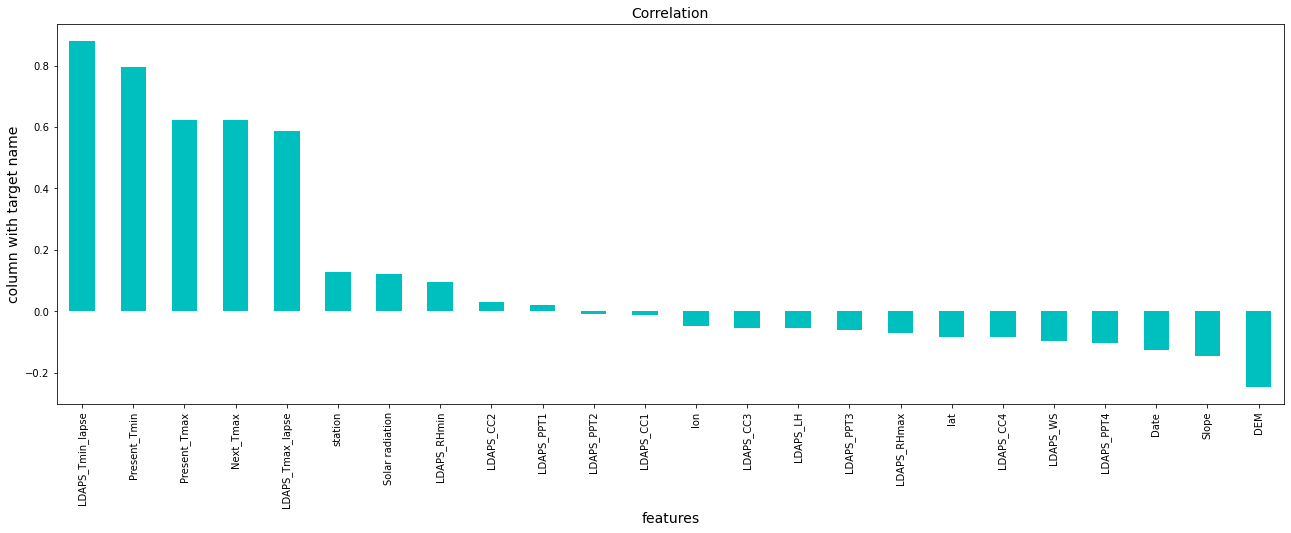

In [20]:
#plotting graph showing +ve and -ve correlation of coloumn(with target col.-primary_fuel)
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('features', fontsize=14)
plt.ylabel('column with target name', fontsize=14)
plt.title('Correlation', fontsize=14)
plt.show

In [ ]:
# Above corerelation matrix with target columns shown as follows:
# 10 columns shown +ve correlation with Target column, whereas highest correaltion is 0.881708.
# remaining cols. shown -ve correaltion.

In [21]:
df.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,154.460139,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,89.517454,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,77.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,154.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,232.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,309.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


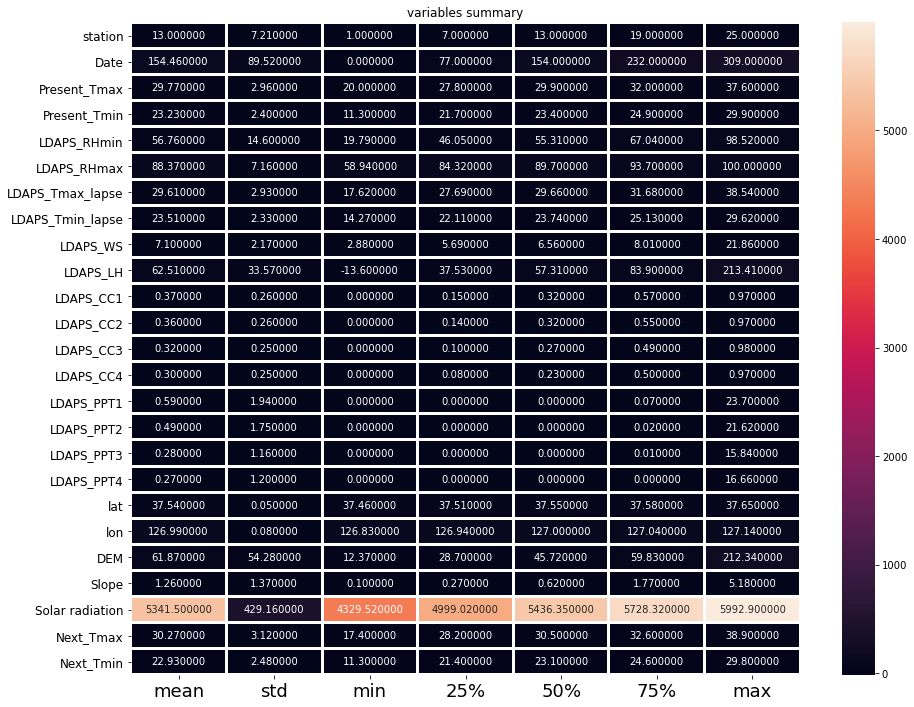

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables summary")
plt.show()

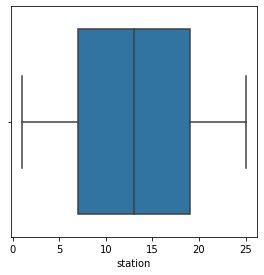

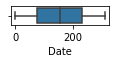

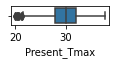

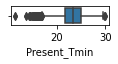

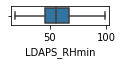

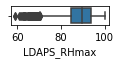

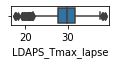

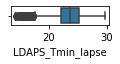

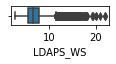

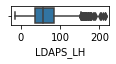

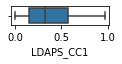

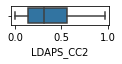

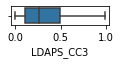

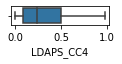

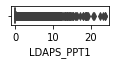

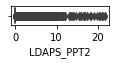

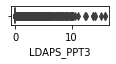

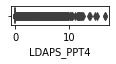

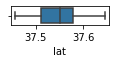

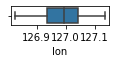

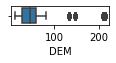

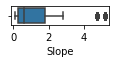

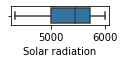

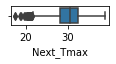

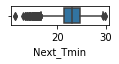

In [23]:
#checking outliers
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column], orient='v')
        plt.xlabel(column, fontsize=10)
    graph+=1
    plt.show()

In [ ]:
#outliers is present in some columns for example:age,policy_annual_premium,umbrella limit, etc need to remove outliers

In [25]:
df['LDAPS_CC1'].value_counts()

0.000000    108
0.368774     75
0.967277      2
0.380864      1
0.267451      1
0.490767      1
0.741085      1
0.008720      1
0.063418      1
0.017310      1
0.698819      1
0.110950      1
0.458395      1
0.444472      1
0.285251      1
0.879500      1
0.194798      1
0.889143      1
0.093464      1
0.496486      1
0.157422      1
0.288030      1
0.089755      1
0.042295      1
0.146442      1
0.684454      1
0.031530      1
0.114958      1
0.780191      1
0.004326      1
0.641501      1
0.036169      1
0.108152      1
0.226065      1
0.190660      1
0.245992      1
0.783438      1
0.704178      1
0.072614      1
0.012621      1
0.285446      1
0.087846      1
0.373557      1
0.025608      1
0.707044      1
0.538258      1
0.203298      1
0.014433      1
0.610532      1
0.307419      1
0.025239      1
0.142641      1
0.571397      1
0.277606      1
0.071676      1
0.204752      1
0.245173      1
0.582069      1
0.182483      1
0.280791      1
0.024217      1
0.621235      1
0.334382

In [26]:
df.LDAPS_LH.unique()

array([69.45180527, 51.93744783, 20.57304966, ..., 72.05829446,
       47.24145703,  9.09003441])

In [27]:
df.LDAPS_PPT1.unique()

array([0.        , 0.80422247, 0.46474446, ..., 3.45615864, 2.20858192,
       2.04050223])

In [28]:
df.LDAPS_PPT2.unique()

array([ 0.        ,  9.93311109, 11.83342134, ...,  0.29865928,
        0.30087843,  0.24799708])

In [29]:
df.LDAPS_PPT3.unique()

array([0.        , 0.23700432, 0.25371913, ..., 0.09810387, 0.02972079,
       0.02102984])

In [30]:
df['LDAPS_PPT3'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: LDAPS_PPT3, dtype: float64

In [32]:
#removing outliers using z-score method
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [33]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new.shape)
print("Percentage Loss".ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (7752, 25)
shape after          : (6894, 25)
Percentage Loss      : 0.11068111455108359


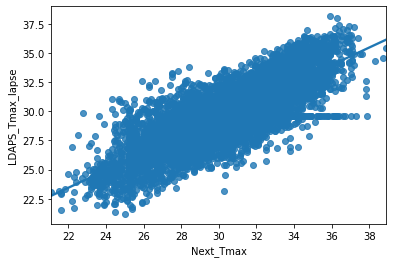

In [34]:
#plot for understanding relation between target col and other cols.
ax=sns.regplot(x='Next_Tmax', y='LDAPS_Tmax_lapse',data=df_new)

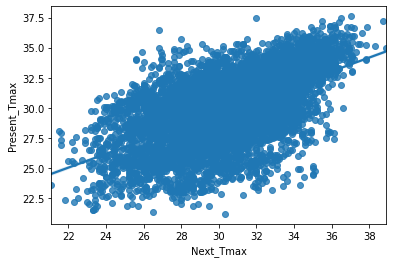

In [35]:
#plot for understanding relation between target col.
ax=sns.regplot(x='Next_Tmax', y='Present_Tmax',data=df_new)

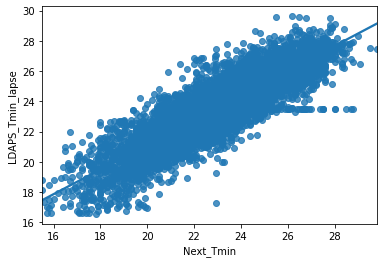

In [36]:
#plot for understanding relation between target col(Next_Tmin).
ax=sns.regplot(x='Next_Tmin', y='LDAPS_Tmin_lapse',data=df_new)

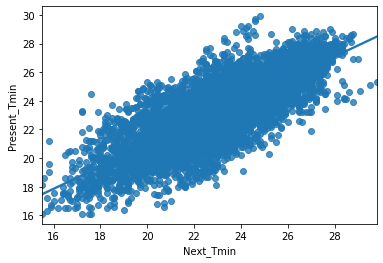

In [37]:
#plot for understanding relation between target col(Next_Tmin)
ax=sns.regplot(x='Next_Tmin', y='Present_Tmin',data=df_new)

In [52]:
#splitting data
x=df_new.drop(["Next_Tmax","Next_Tmin"], axis='columns')
y=df_new["Next_Tmax"]
y1=df_new["Next_Tmin"]

In [53]:
#Checking skewness
x.skew()

station             0.002792
Date                0.008120
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
dtype: float64

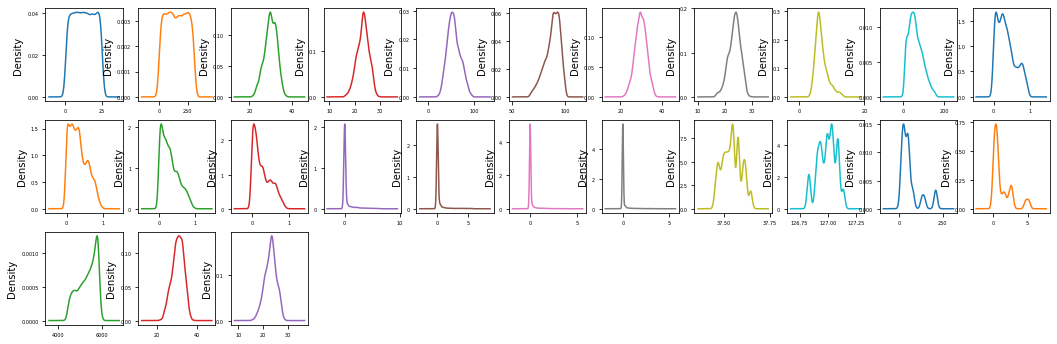

In [42]:
#check distribution for all the colunms
df_new.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=5,figsize=(18,12))
plt.show()

In [54]:
#treating skewness
from sklearn.preprocessing import power_transform
import pandas as pd
x = power_transform(x)
x = pd.DataFrame(x)

In [55]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [56]:
x.shape

(6894, 23)

In [57]:
y.shape

(6894,)

In [58]:
y1.shape

(6894,)

In [59]:
#splitling into tRain and test
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

In [63]:
#importing libs for model building
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  r2_score

In [64]:
#DTR Model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.759129510920197
2.0708687866472433


In [65]:
#model-RFR
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.8594002280545553
0.9850368007905707


In [66]:
#XGB
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_pred = GBR.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.7960118886425261
1.3538109373626126


In [67]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.6461543087638619
2.250142363048789


In [68]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.8072497193654883
1.3021568438624989


In [69]:
#cross-validation of model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=3)
print("Cross validation score of DecisionTree model :", scr.mean())

Cross validation score of DecisionTree model : 0.38662486644516325


In [70]:
scr=cross_val_score(rfr, x, y, cv=3)
print("Cross validation score of RandomForestRegressor model :", scr.mean())

Cross validation score of RandomForestRegressor model : 0.6802064401467985


In [71]:
scr=cross_val_score(GBR, x, y, cv=3)
print("Cross validation score of GradientBoostingRegressor :", scr.mean())

Cross validation score of GradientBoostingRegressor : 0.7008923274364595


In [72]:
scr=cross_val_score(lr, x, y, cv=3)
print("Cross validation score of linearregression :", scr.mean())

Cross validation score of linearregression : 0.6847902340589472


In [73]:
scr=cross_val_score(knn, x, y, cv=3)
print("Cross validation score of KNeighborsRegressor :", scr.mean())

Cross validation score of KNeighborsRegressor : 0.5618794930599057


In [74]:
#Best model Hypertunning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [75]:
#Linear Regressor
parameters = {'n_jobs' :[100, 200, 700],
            'positive': ['bool'],
            'copy_X': ['bool']}

In [76]:
GCV = GridSearchCV(LinearRegression(),parameters,cv=3)

In [77]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': ['bool'], 'n_jobs': [100, 200, 700],
                         'positive': ['bool']})

In [78]:
GCV.best_params_

{'copy_X': 'bool', 'n_jobs': 100, 'positive': 'bool'}

In [79]:
mod=LinearRegression(copy_X= 'bool', n_jobs= 100, positive= 'bool')

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

70.27159204033875


In [80]:
#saving model
import joblib
joblib.dump(mod,"Temperature prediction Next Max.pkl")

['Temperature prediction Next Max.pkl']

In [ ]:
#model building using Next_min target variable

In [81]:
#splitling into tRain and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=.25)

In [82]:
#DTR Model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.7624413294240517
1.248961746492439


In [83]:
#model-RFR
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.8725725395529065
0.5641796405369167


In [84]:
#XGB
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_pred = GBR.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.8558701698297888
0.6389089784300077


In [85]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.7608972781329336
1.0470734215747564


In [86]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
mse = mean_squared_error(y_pred,y_test)
r2score = r2_score(y_pred,y_test)
print(r2score)
print(mse)

0.802806943645625
0.8050915263183426


In [93]:
#cross-validation of model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y1, cv=3)
print("Cross validation score of DecisionTree model :", scr.mean())

Cross validation score of DecisionTree model : 0.5120053397146654


In [91]:
scr=cross_val_score(rfr, x, y1, cv=3)
print("Cross validation score of RandomForestRegressor model :", scr.mean())

Cross validation score of RandomForestRegressor model : 0.7495555378817542


In [90]:
scr=cross_val_score(GBR, x, y1, cv=3)
print("Cross validation score of GradientBoostingRegressor :", scr.mean())

Cross validation score of GradientBoostingRegressor : 0.7580661129430201


In [92]:
scr=cross_val_score(lr, x, y1, cv=3)
print("Cross validation score of linearregression :", scr.mean())

Cross validation score of linearregression : 0.7514926720667657


In [94]:
scr=cross_val_score(knn, x, y1, cv=3)
print("Cross validation score of KNeighborsRegressor :", scr.mean())

Cross validation score of KNeighborsRegressor : 0.5300155428681927


In [95]:
#Best model Hypertunning
from sklearn.model_selection import GridSearchCV

In [100]:
#Linear Regressor
parameters = {'n_jobs' :[100, 200, 400, 700],
            'positive': ['bool'],
            'copy_X': ['bool']}

In [101]:
GCV = GridSearchCV(LinearRegression(),parameters,cv=3)

In [102]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'copy_X': ['bool'], 'n_jobs': [100, 200, 400, 700],
                         'positive': ['bool']})

In [103]:
GCV.best_params_

{'copy_X': 'bool', 'n_jobs': 100, 'positive': 'bool'}

In [104]:
mod=LinearRegression(copy_X= 'bool', n_jobs= 100, positive= 'bool')

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

79.21823595549078


In [105]:
#saving model
import joblib
joblib.dump(mod,"Temperature prediction Next Min.pkl")

['Temperature prediction Next Min.pkl']